----
###### 목차
0. 데이터 불러오기
1. train.csv 파일만 분석하기로 결정
2. 데이터 전처리하기
3. Pandas Visualizer로 raw data 살펴보기

----
<br><br><br>


# 0. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
#train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')

train = pd.read_csv('train.csv', encoding='CP949')
test = pd.read_csv('train.csv', encoding='CP949')

# 1. train.csv 파일만 분석하기로 결정


## 1.1 데이터 훑어보기

In [6]:
train.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [7]:
test.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


## 1.2 데이터 결측치 확인하기

In [8]:
train.isnull().sum().sort_values(ascending=False)

num           0
date_time     0
전력사용량(kWh)    0
기온(°C)        0
풍속(m/s)       0
습도(%)         0
강수량(mm)       0
일조(hr)        0
비전기냉방설비운영     0
태양광보유         0
dtype: int64

In [9]:
test.isnull().sum().sort_values(ascending=False)

num           0
date_time     0
전력사용량(kWh)    0
기온(°C)        0
풍속(m/s)       0
습도(%)         0
강수량(mm)       0
일조(hr)        0
비전기냉방설비운영     0
태양광보유         0
dtype: int64

**결측치가 없는 train 데이터로 EDA를 진행하는 것으로 결정함**

# 2. 데이터 전처리하기

## 2.1 영문 컬럼명으로 변경하기

In [10]:
train.columns = ['num', 'date_time', 'target', 'temp', 'wind', 'humid', 'rain', 'sunny', 'cooler', 'solar']
train.head()

,num,date_time,target,temp,wind,humid,rain,sunny,cooler,solar
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


## 2.2 날짜와 관련된 컬럼 추가하기

In [11]:
train['date_time'] = pd.to_datetime(train['date_time'])
train['date'] = train['date_time'].dt.date
train['day'] = train['date_time'].dt.day
train['month'] = train['date_time'].dt.month
train['hour'] = train['date_time'].dt.hour
train['weekday'] = train['date_time'].dt.weekday # 0: 월요일
train['dayofyear'] = train.date_time.dt.dayofyear            # 연 기준 몇일째(숫자)
train.head()

,num,date_time,target,temp,wind,humid,rain,sunny,cooler,solar,date,day,month,hour,weekday,dayofyear
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,2020-06-01,1,6,0,0,153
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,2020-06-01,1,6,1,0,153
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2020-06-01,1,6,2,0,153
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,2020-06-01,1,6,3,0,153
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,2020-06-01,1,6,4,0,153


# 3. Pandas Visualizer로 raw data 살펴보기

train 데이터 전체를 살펴보기도 하고, 건물번호 별로 살펴보기도 했습니다.
아래는 건물번호 1번 그래프를 살펴본 코드입니다.

In [16]:
# from pandas_visual_analysis import VisualAnalysis
# VisualAnalysis(train[train['num']==1])

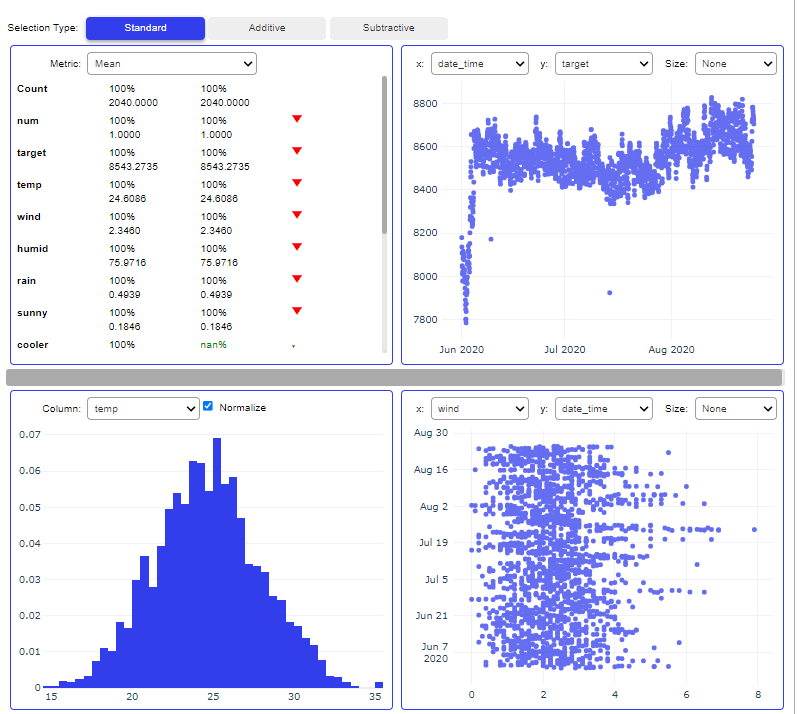

노트북을 저장하면 나타나지 않는 프로그램이라, 캡쳐화면으로 대체합니다.

컬럼당 평균값, 최소 , 중간, 최대, 1분위수, 3분위수에 대한 정보를 확인할 수 있으며, 컬럼 2개를 선택하여 scatter plot과 히스토그램 그래프를 그려볼 수 있는 기능이 있는 패키지입니다.

# 4. 시계열 분석으로 raw data 알아보기

In [13]:
import os

# Time Series 생성
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
#df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = train['target']  
print(type(ts))
ts.head()

<class 'pandas.core.series.Series'>


0    8179.056
1    8135.640
2    8107.128
3    8048.808
4    8043.624
Name: target, dtype: float64

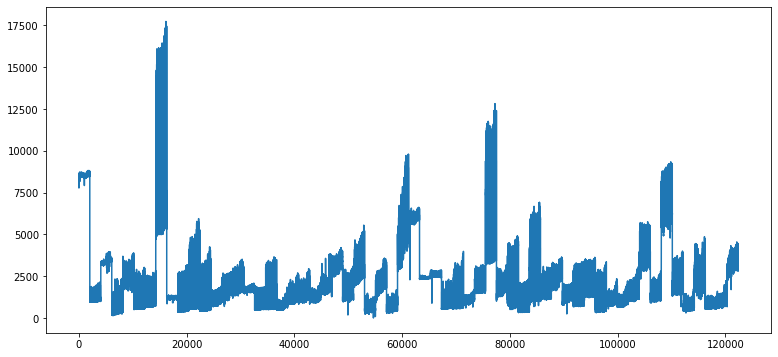

In [14]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    

plt.plot(ts)

Series([], Name: target, dtype: float64)


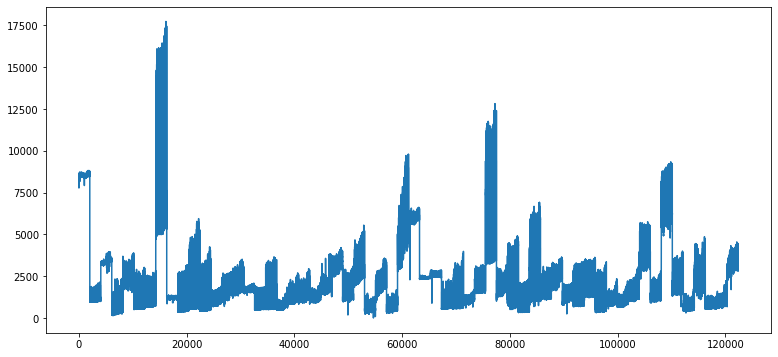

In [16]:
ts=ts.interpolate(method='time')   

print(ts[ts.isna()])

plt.plot(ts)

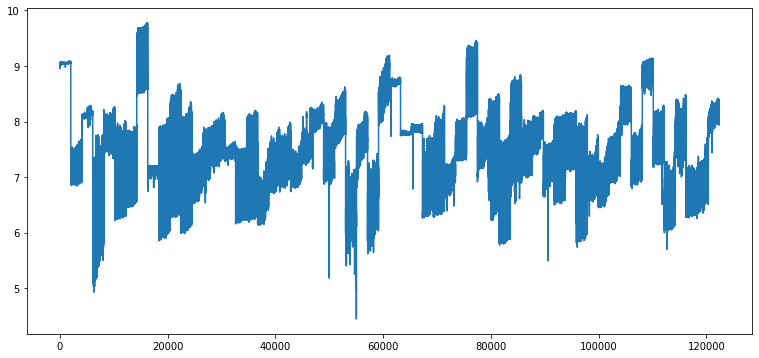

In [17]:
ts_log = np.log(ts)
plt.plot(ts_log)

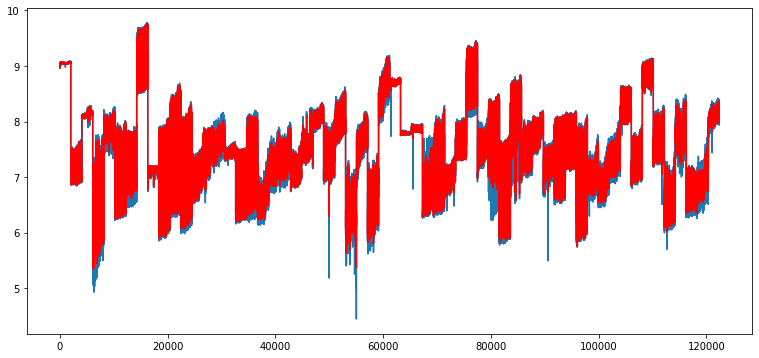

In [18]:
# 시계열 안정성 분석
moving_avg = ts_log.rolling(window=7).mean()  # moving average구하기, 7일 간격으로 이동평균을 구해 봄, 건물 사용이 평일, 휴일에 차이가 발생하므로
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [19]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(20)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6    -0.011640
7    -0.003713
8    -0.001442
9     0.006706
10    0.009595
11    0.007080
12    0.003767
13    0.003238
14    0.000247
15   -0.002186
16   -0.006760
17   -0.007289
18   -0.004019
19   -0.003100
Name: target, dtype: float64

In [20]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

6    -0.011640
7    -0.003713
8    -0.001442
9     0.006706
10    0.009595
11    0.007080
12    0.003767
13    0.003238
14    0.000247
15   -0.002186
16   -0.006760
17   -0.007289
18   -0.004019
19   -0.003100
20   -0.005386
Name: target, dtype: float64

In [21]:
# 이동평균구하기
def plot_rolling_statistics(timeseries, window=7):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


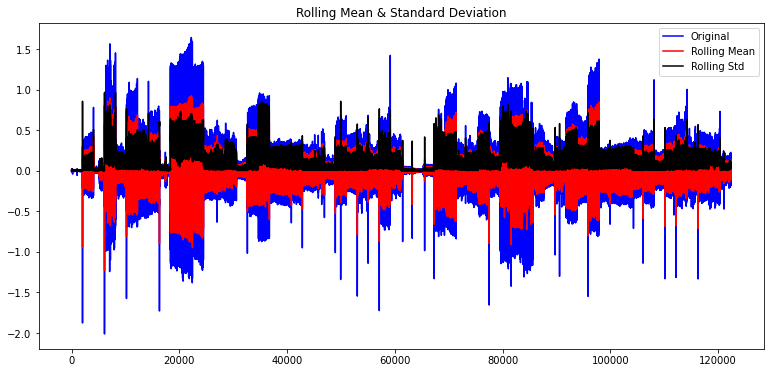

In [22]:
plot_rolling_statistics(ts_log_moving_avg)

In [23]:
# tatsmodels 패키지에서 제공하는 adfuller 메서드를 이용해 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


In [24]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                    -46.733467
p-value                             0.000000
#Lags Used                         71.000000
Number of Observations Used    122311.000000
Critical Value (1%)                -3.430403
Critical Value (5%)                -2.861564
Critical Value (10%)               -2.566783
dtype: float64


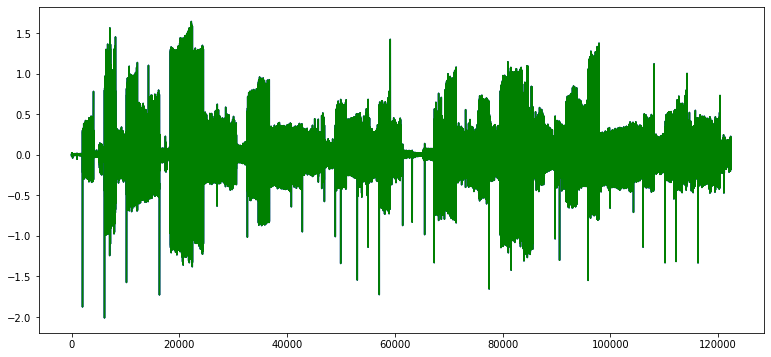

In [25]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift() # 시프트한 시계열과 원본 시계열에 대한 그래프

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

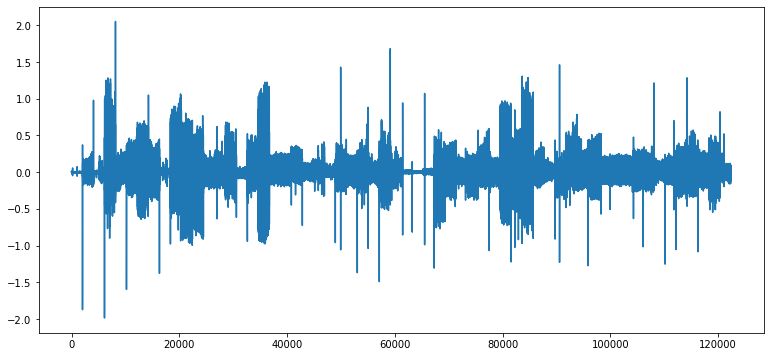

In [26]:
# 원본 시계열에서 시프트한 시계열을 뺀 값 그래프
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

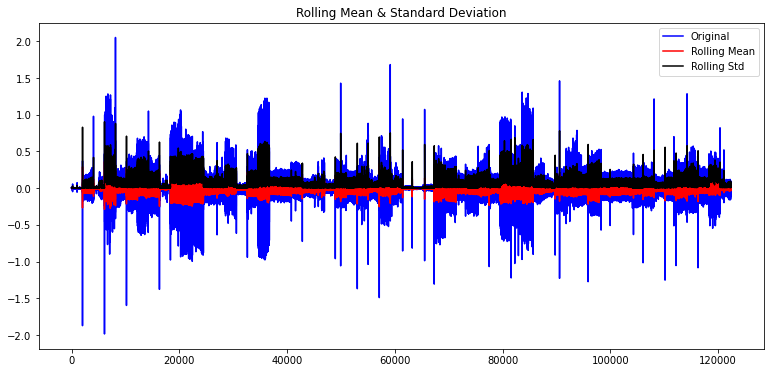

In [27]:
# 이동평균과, 이동표준편차를 그래프에 나타내어 정성적으로 안정성(stationary) 여부를 파악해보기
plot_rolling_statistics(ts_log_moving_avg_diff)

In [28]:
# 차분의 효과 알아보기 위해 Augmented Dickey-Fuller Test를 수행해 보기
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                    -75.268336
p-value                             0.000000
#Lags Used                         71.000000
Number of Observations Used    122310.000000
Critical Value (1%)                -3.430403
Critical Value (5%)                -2.861564
Critical Value (10%)               -2.566783
dtype: float64


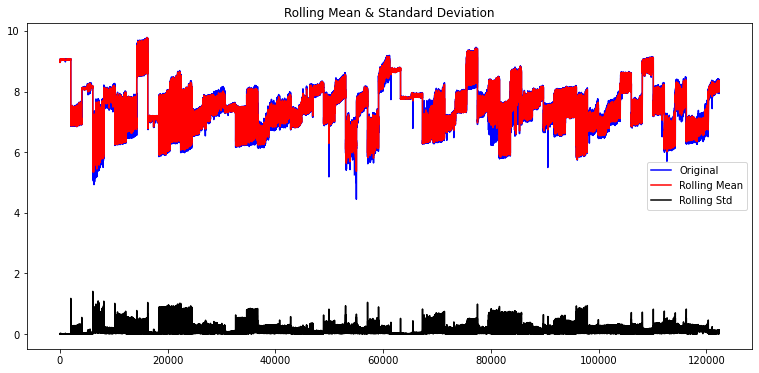

LinAlgError: SVD did not converge

In [199]:
# 정성적 그래프 분석
#plot_rolling_statistics(ts_log, window=7)

#정량적 Augmented Dicky-Fuller Test
#augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
#from statsmodels.tsa.seasonal import seasonal_decompose
#decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

#trend = decomposition.trend
#seasonal = decomposition.seasonal
#residual = decomposition.resid

#plt.subplot(411)
#plt.plot(ts_log, label='Original')
#plt.legend(loc='best')
#plt.subplot(412)
#plt.plot(trend, label='Trend')
#plt.legend(loc='best')
#plt.subplot(413)
#plt.plot(seasonal,label='Seasonality')
#plt.legend(loc='best')
#plt.subplot(414)
#plt.plot(residual, label='Residuals')
#plt.legend(loc='best')
#plt.tight_layout()

# error message
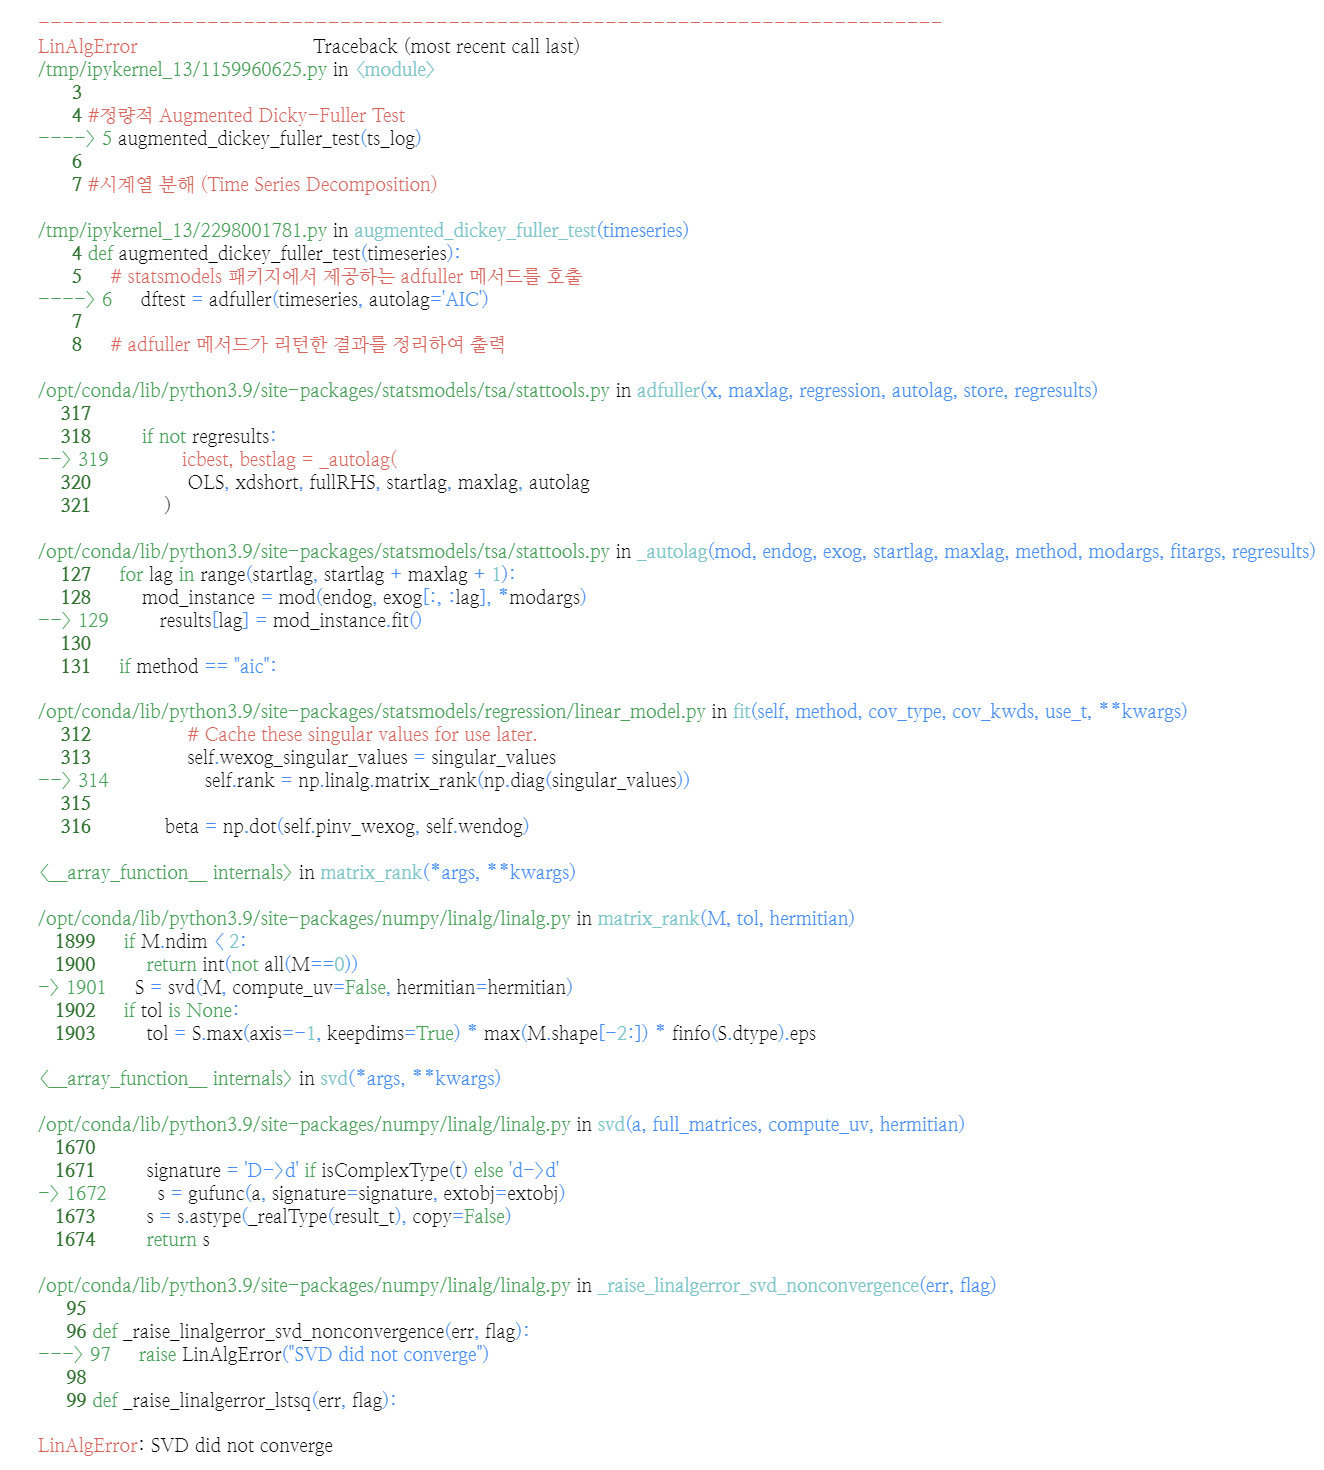

